In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
import dash
import dash_html_components as html

In [22]:
import dash
import plotly.express as px
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [3]:
gapminder = px.data.gapminder()
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

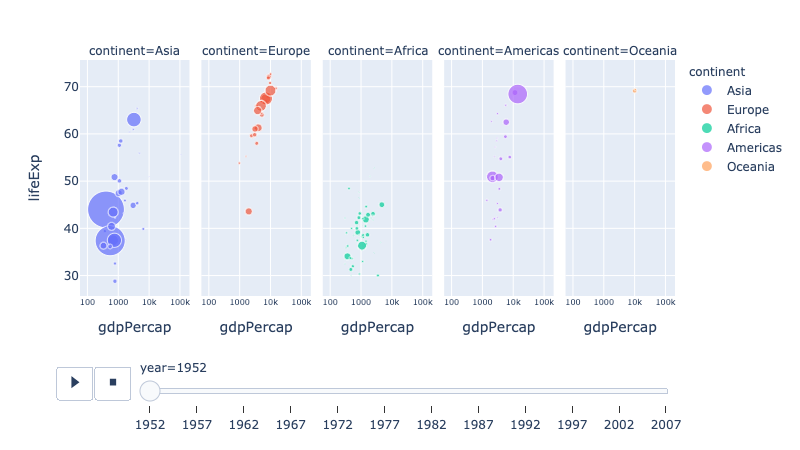

In [4]:
facet_fig =px.scatter(gapminder, x='gdpPercap', y='lifeExp',  log_x=True, hover_name="country",
          size="pop", size_max=40, color="continent",
          facet_col="continent",
          width=800,
          animation_frame="year")
facet_fig.update_xaxes(tickfont={"size":8})
facet_fig.show()

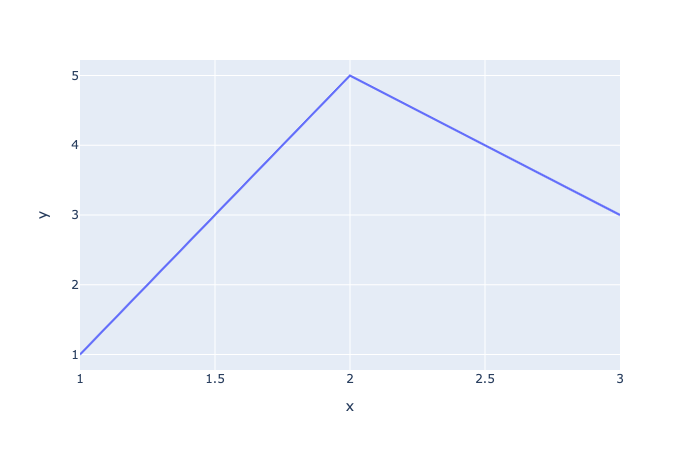

In [5]:
df = pd.DataFrame([[1,1], [2,5],[3,3]], columns=["x","y"])
px.line(df, x="x", y="y").show()

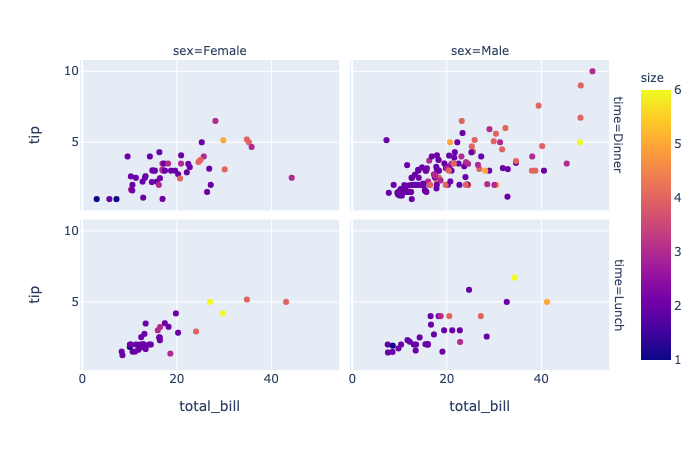

In [6]:
tips = px.data.tips()
px.scatter(tips, x="total_bill", y='tip', color="size",facet_row="time", facet_col="sex").show()

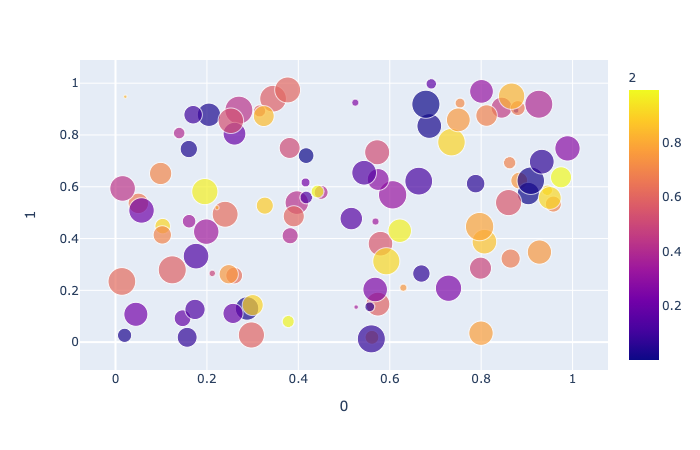

In [7]:
np.random.seed(1)
arr= np.random.rand(100, 4)
px.scatter(arr, x=0 , y=1, color=2, size=3).show()

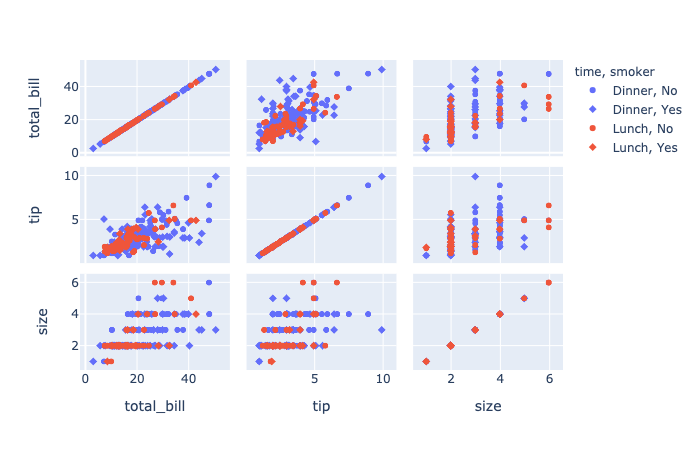

In [8]:
scatter_matrix_fig=px.scatter_matrix(
    tips,
    dimensions=["total_bill","tip","size"],
    color="time",
    symbol="smoker",
).show()

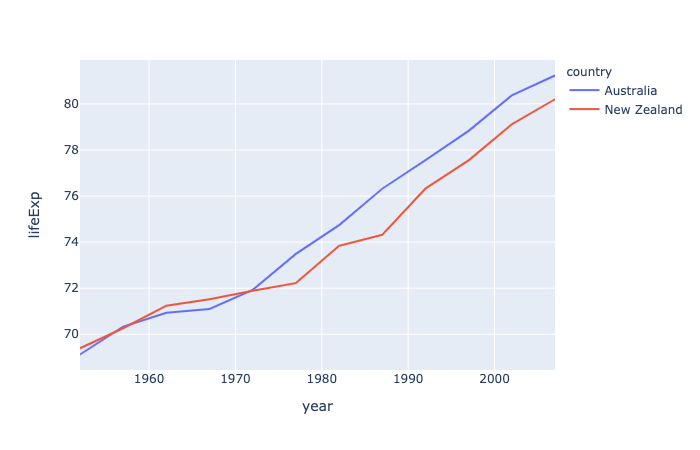

In [9]:
gapminder_Oceania = gapminder.loc[gapminder["continent"]=="Oceania"]
px.line(
gapminder_Oceania,
x="year",
y="lifeExp",
color="country").show()

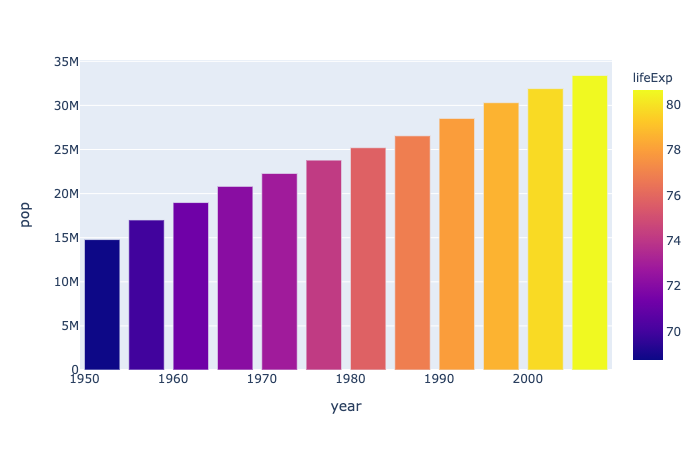

In [10]:
gapminder_Canada = gapminder.loc[gapminder["country"]=="Canada"]
px.bar(
gapminder_Canada,
x="year",
y="pop",
color="lifeExp",
hover_data=["lifeExp","gdpPercap"]).show()

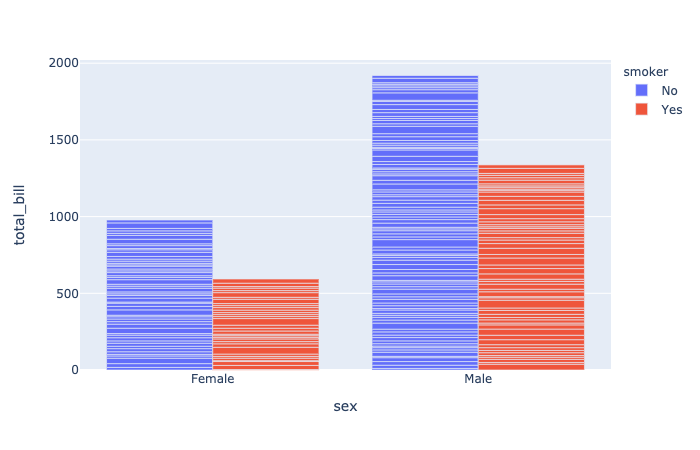

In [11]:
px.bar(
tips,
x="sex",
y="total_bill",
color="smoker",
barmode="group").show()

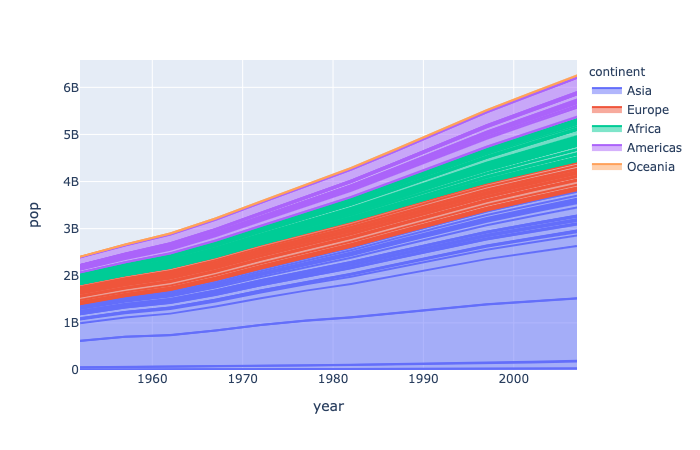

In [12]:
px.area(
gapminder,
x="year",
y="pop",
color="continent",
line_group="country").show()

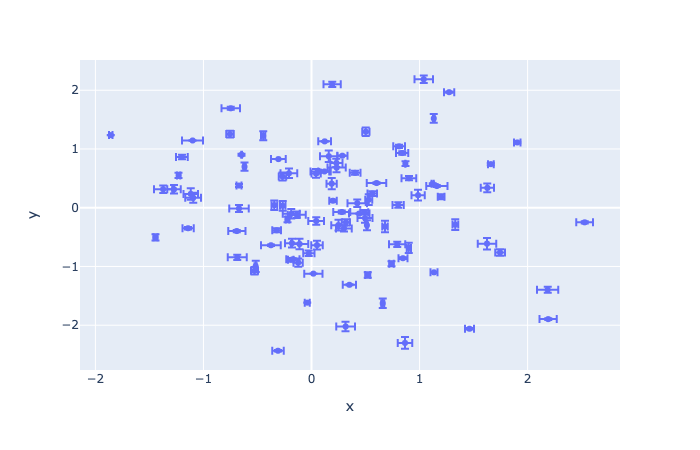

In [13]:
np.random.seed(1)
df = pd.DataFrame(np.random.randn(100,2),columns=['x','y'])
px.scatter(
df,x="x",y="y",error_x=np.random.rand(100)*0.1,error_y=np.random.rand(100)*0.1).show()

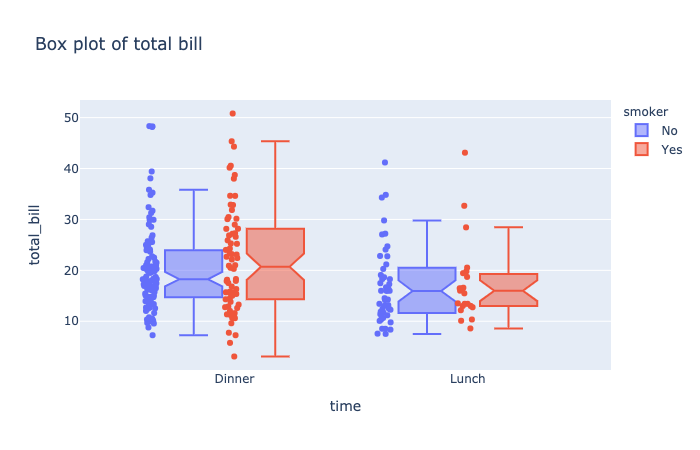

In [14]:
px.box(tips, x="time", y="total_bill",color="smoker" , notched=True,points="all",title="Box plot of total bill", hover_data=["day"]).show()

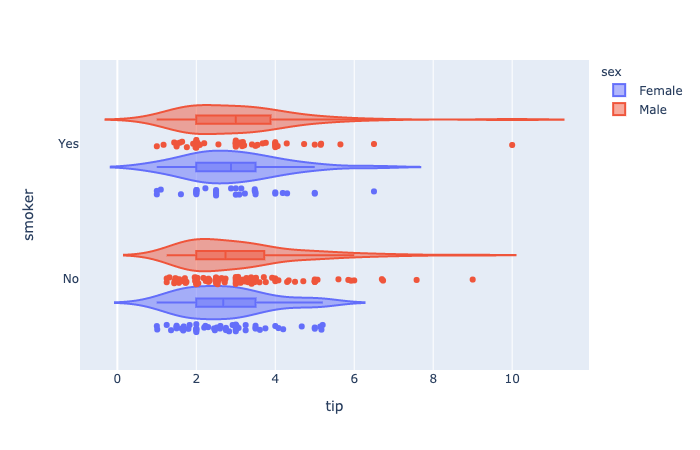

In [15]:
px.violin(tips, x="tip", y="smoker",color="sex" , box=True, points="all", hover_data=tips.columns,).show()

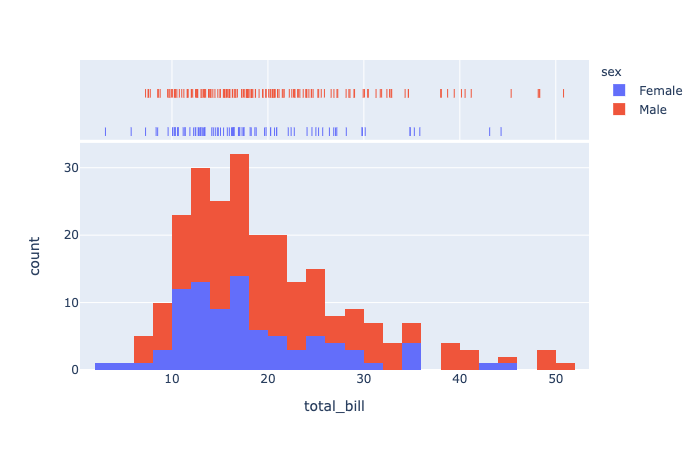

In [16]:
px.histogram(
tips,
x="total_bill",
color="sex",
marginal="rug",
 hover_data=tips.columns,).show()

In [17]:
iris= px.data.iris()

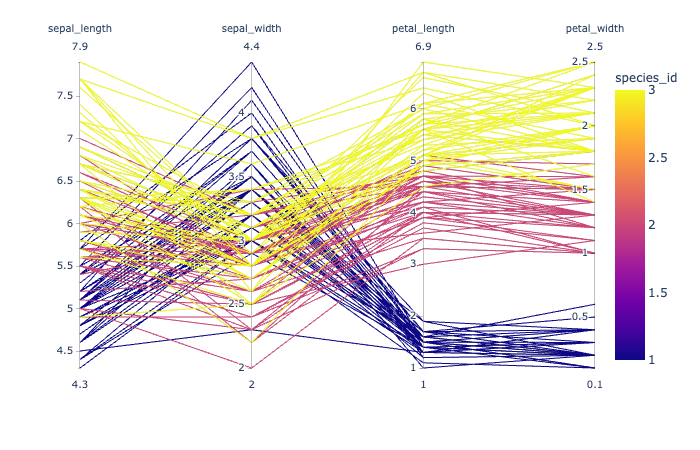

In [18]:
px.parallel_coordinates(
iris,
dimensions=["sepal_length","sepal_width","petal_length","petal_width"],
color="species_id",)

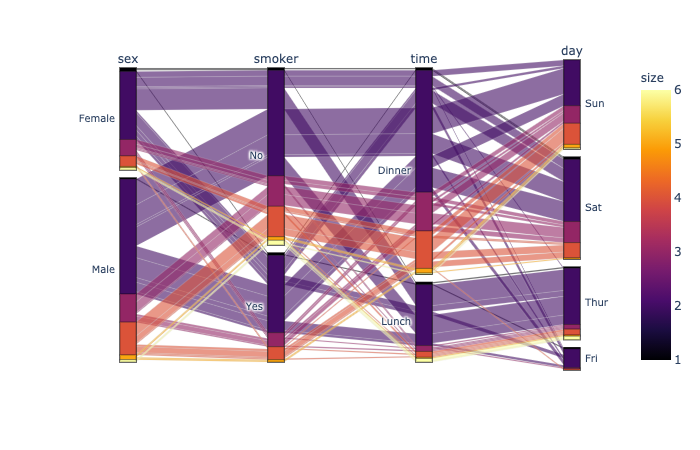

In [19]:
px.parallel_categories(
tips,
dimensions=["sex","smoker","time","day"],
color="size",
color_continuous_scale=px.colors.sequential.Inferno,).show()

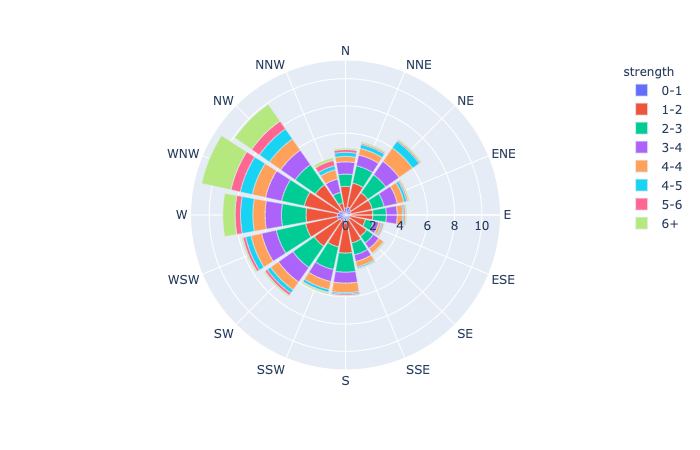

In [20]:
wind = px.data.wind()
px.bar_polar(
wind,
r = "frequency",
theta="direction",
color="strength",).show()

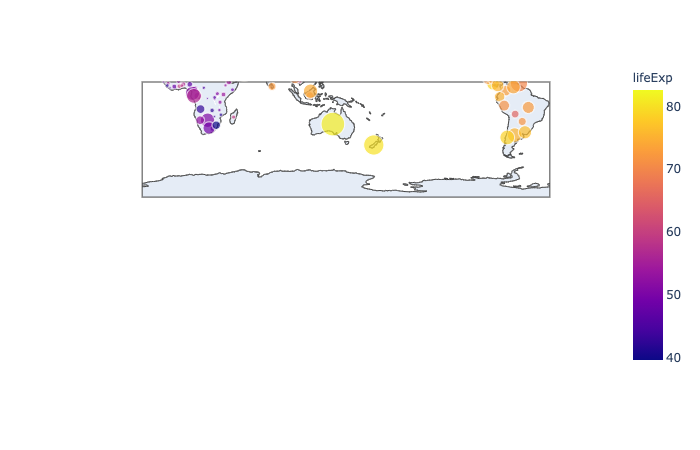

In [21]:
gapminder_2007= gapminder[gapminder["year"]==2007]
px.scatter_geo(
gapminder_2007,
locations="iso_alpha",
size="gdpPercap",
color="lifeExp",
hover_name="country",).show()

In [28]:
stocks = plotly.data.stocks()
stocks.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

In [29]:
import plotly.graph_objects as go
import plotly
ts_layout = go.Layout(
xaxis={
    "rangeslider":{"visible":True},
    "rangeselector":{
        "buttons":[
            {"label":"1m","step":"month","count":1},
            {"label":"7d","step":"day","count":7},
            {"step":"all"}
        ]
    }
}
)
go.Figure(
    go.Scatter(x=stocks["date"], y=stocks["GOOG"]),layout=ts_layout).show()

In [30]:
interp_x, interp_y = np.array([1,2,3]), np.array([1,3,2])
line_shapes= "linear","spline", "hv","vh","hvh","vhv"
interp_fig = make_subplots(rows=6, cols=1, subplot_titles=line_shapes)
for i , shape_name in enumerate(line_shapes, 1):
    interp_fig.add_trace(
    go.Scatter(
    x = interp_x,
    y = interp_y,
    name=shape_name,
    line={"shape":shape_name},
    hovertext=shape_name,
    ),
    row=i,
    col=1,
    )
interp_fig.show()

In [31]:
line_trace = go.Scatter(x=[0,1,2], y=[5,3,4], name="line")
scatter_trace = go.Scatter(x=[1,2,3], y=[2,1,5], mode="markers", name="scatter")
bar_trace=go.Bar(x=[1,2,3], y=[1,2,3], name="bar")
area_trace = go.Scatter(
    x=[3,4,5],
    y=[5,3,4],
    mode="none",
    fillcolor="#1f77b4",
    fill="tozeroy",
    name="area"
)
subplots_fig = make_subplots(rows=2, cols=2)
subplots_fig.add_trace(line_trace,row=1,col=1)
subplots_fig.add_trace(scatter_trace,row=1,col=2)
subplots_fig.add_trace(bar_trace,row=2,col=1)
subplots_fig.add_trace(area_trace,row=2,col=2)
subplots_fig.show()

In [ ]:
import dash
import plotly.express as px
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

tips = px.data.tips()
dash_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]
app = dash.Dash(__name__, external_stylesheets=dash_stylesheets)
app.layout= html.Div(
    [
        html.H3(id="title", style={"textAlign":"center"}),
        html.Div(
        [
            htnl.Div([
                html.H4("曜日選択"),
                dcc.Dropdown(
                id="day_selector",
                options=[
                    {}
                ])
        ]
    ]
)

In [23]:
import dash
import plotly.express as px
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
app = dash.Dash(__name__)
app.layout = html.Div(
    [
        html1.H1("京都へようこそ!")、
        html1.H２("おすすめ観光スポット")、
        html1.p("- 清水寺", "n-clicks=0",id="one")、
        html1.p("- 八坂神社", "n-clicks=0",id="two")、
        html1.p("- 銀閣寺", "n-clicks=0",id="three")、
        html1.p("- 大文字", "n-clicks=0",id="four")、
        html1.p("- 鴨川", "n-clicks=0",id="five")、
    ],
    style = {"textAlign":"center"},
)

for id_ in ["one","two","three","four","five"]:
    @app.callback(Output(id_, "hidden"),Input(id_, "n-clicks"))
    def letter_disappear(n-clicks):
        if n-clicks % 2 == 1:
            return True
if __name__=="__main__":
    app.run_server(degub=True)

SyntaxError: invalid character in identifier (<ipython-input-23-2c30e6b30398>, line 9)

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

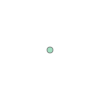

In [2]:
point1

In [3]:
type(point1)

shapely.geometry.point.Point

In [4]:
point_coords = point1.coords
print(point_coords)

In [8]:
xy = point_coords.xy
x=point1.x
y=point1.y
print("xy:", xy, "\n")
print("x:", x, "\n")
print("y:", y)

xy: (array('d', [2.2]), array('d', [4.2])) 

x: 2.2 

y: 4.2


In [9]:
point_dist = point1.distance(point2)
print(point_dist)

29.723559679150142


In [12]:
line = LineString([point1, point2, point3])
lxy = line.xy
print(lxy)
l_length = line.length
l_centroid = line.centroid

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [14]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly2 = Polygon([p.x,p.y] for p in [point1,point2,point3])

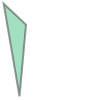

In [15]:
poly

In [19]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [21]:
world = Polygon(shell=world_exterior)
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

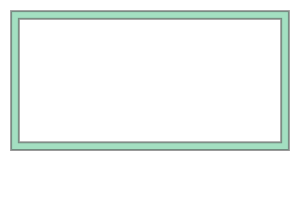

In [22]:
world_has_a_hole

In [25]:
world_centroid = world.centroid
world_area = world.area
world_bbox = world.bounds
world_ext = world.exterior
world_ext_length = world_ext.length

In [26]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box
multi_point = MultiPoint([point1, point2, point3])
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_poly = Polygon(shell=west_exterior, holes=west_hole)
min_x, min_y = 0, -90
max_x, max_y = 180, 90
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
multi_poly = MultiPolygon([west_poly, east_poly_box])
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


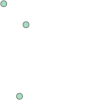

In [27]:
multi_point

In [45]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [51]:
import geopandas as gpd
import requests
import geojson

# Specify the url for the backend. Here we are using data from Statistics Finland: https://www.stat.fi/org/avoindata/paikkatietoaineistot_en.html
url = 'http://geo.stat.fi/geoserver/vaestoruutu/wfs'

# Specify parameters (read data in json format).
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', version='2.0.0', request='GetFeature',
         typeName='vaestoruutu:vaki2017_5km', outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
data = gpd.GeoDataFrame.from_features(geojson.loads(r.content))


In [55]:
data.head()

geometry  objectid kunta  \
0  POLYGON ((85000.000 6690000.000, 85000.000 669...        74   043   
1  POLYGON ((85000.000 6695000.000, 85000.000 670...        75   043   
2  POLYGON ((85000.000 6700000.000, 85000.000 670...        76   043   
3  POLYGON ((90000.000 6690000.000, 90000.000 669...        97   043   
4  POLYGON ((90000.000 6695000.000, 90000.000 670...        98   043   

          grd_id  id_nro  xkoord   ykoord  vaesto  miehet  naiset  ika_0_14  \
0  5kmN1338E0017    2436   85000  6690000      58      25      33         7   
1  5kmN1339E0017    2571   85000  6695000     450     231     219        66   
2  5kmN1340E0017    2706   85000  6700000      80      44      36         7   
3  5kmN1338E0018    2437   90000  6690000      36      19      17         3   
4  5kmN1339E0018    2572   90000  6695000     275     139     136        47   

   ika_15_64  ika_65_                              bbox  
0         39       12  [85000, 6690000, 90000, 6695000]  
1        266      118  [85000, 6695000, 90000, 6700000]  
2         56       17  [85000, 6700000, 90000, 6705000]  
3         19       14  [90000, 6690000, 95000, 6695000]  
4        160       68  [90000, 6695000, 95000, 6700000]

In [100]:
import geopandas as gpd
import os

# Define path to folder
input_folder = r"data/L2_data/NLS/2018/L4/L41/L4132R.shp"

# Join folder path and filename
fp = os.path.join(input_folder, "m_L4132R_p.shp")

# Print out the full file path
print(fp)

data/L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp


In [101]:
data = gpd.read_file(fp)

In [102]:
type(data)
print(data.head())

  TEKSTI  RYHMA  LUOKKA  TASTAR  KORTAR  KORARV  KULKUTAPA    KOHDEOSO  \
0   None     64   32421    5000       0     0.0          0  1812247077   
1   None     64   32421    5000       0     0.0          0  1718796908   
2   None     64   32421   20000       0     0.0          0   411167695   
3   None     64   32421   20000       0     0.0          0   411173768   
4   None     64   32421   20000       0     0.0          0   411173698   

   AINLAHDE SYNTYHETKI  ... KARTOGLK  ALUEJAKOON  VERSUH  SUUNTA  SIIRT_DX  \
0         1   20180125  ...        0           0       0       0         0   
1         1   20180120  ...        0           0       0       0         0   
2         1   20180120  ...        0           0       0       0         0   
3         1   20180120  ...        0           0       0       0         0   
4         1   20180120  ...        0           0       0       0         0   

   SIIRT_DY  KORKEUS  ATTR2  ATTR3  \
0         0      0.0      0      0   
1         

In [103]:
data.columns

Index(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV', 'KULKUTAPA',
       'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI', 'KARTOGLK',
       'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX', 'SIIRT_DY', 'KORKEUS',
       'ATTR2', 'ATTR3', 'geometry'],
      dtype='object')

In [104]:
data = data[['RYHMA', 'LUOKKA',  'geometry']]
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data.rename(columns=colnames, inplace=True)
data.columns

Index(['GROUP', 'CLASS', 'geometry'], dtype='object')

In [105]:
print("Number of rows", len(data['CLASS']))
print("Number of classes", data['CLASS'].nunique())
print("Number of groups", data['GROUP'].nunique())

Number of rows 4311
Number of classes 20
Number of groups 1


<AxesSubplot:>

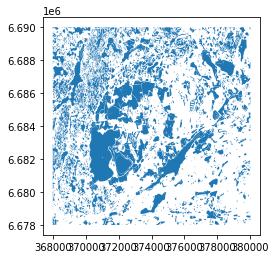

In [106]:
%matplotlib inline
data.plot()

In [107]:
print("Polygon:", data.at[0, "geometry"])
print("Area:", round(data.at[0, "geometry"].area,0), "square meters")

Polygon: POLYGON ((379394.248 6689991.936, 379389.79 6690000, 379408.646 6690000, 379394.248 6689991.936))
Area: 76.0 square meters


In [108]:
for index, row in data[0:5].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {index} is: {area:.2f} m^2".format(index=index, area=poly_area))

Polygon area at index 0 is: 76.03 m^2
Polygon area at index 1 is: 2652.05 m^2
Polygon area at index 2 is: 3185.65 m^2
Polygon area at index 3 is: 13075.17 m^2
Polygon area at index 4 is: 3980.68 m^2


In [109]:
data['area'] = data.area

In [110]:
max_area = data['area'].max()
min_area = data['area'].min()
mean_area = data['area'].mean()
print("Max area: {maximum} square meters".format(maximum=round(max_area, 0)))
print("Min area: {minimum} square meters".format(minimum=round(min_area, 0)))
print("Mean area: {mean} square meters".format(mean=round(mean_area, 0)))

Max area: 4084558.0 square meters
Min area: 1.0 square meters
Mean area: 11522.0 square meters


<AxesSubplot:>

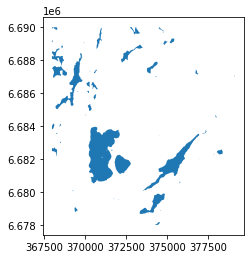

In [111]:
selection = data.loc[data["CLASS"]==36200]
selection.plot()

In [113]:
output_folder = r"data/L2_data/"
output_fp = os.path.join(output_folder, "Class_36200.shp")
selection.to_file(output_fp)

In [137]:

data.head()

GROUP  CLASS                                           geometry  \
0     64  32421  POLYGON ((379394.248 6689991.936, 379389.790 6...   
1     64  32421  POLYGON ((378980.811 6689359.377, 378983.401 6...   
2     64  32421  POLYGON ((378804.766 6689256.471, 378817.107 6...   
3     64  32421  POLYGON ((379229.695 6685025.111, 379233.366 6...   
4     64  32421  POLYGON ((379825.199 6685096.247, 379829.651 6...   

           area  
0     76.027392  
1   2652.054186  
2   3185.649995  
3  13075.165279  
4   3980.682621

In [140]:
grouped = data.groupby('CLASS')
grouped.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

In [141]:
for key, group in grouped:
    print('Terrain class:', key)
    print('Number of rows:', len(group), "\n")

Terrain class: 32111
Number of rows: 1 

Terrain class: 32112
Number of rows: 1 

Terrain class: 32200
Number of rows: 2 

Terrain class: 32421
Number of rows: 110 

Terrain class: 32500
Number of rows: 2 

Terrain class: 32611
Number of rows: 257 

Terrain class: 32612
Number of rows: 11 

Terrain class: 32800
Number of rows: 80 

Terrain class: 32900
Number of rows: 28 

Terrain class: 33000
Number of rows: 5 

Terrain class: 33100
Number of rows: 118 

Terrain class: 34100
Number of rows: 3005 

Terrain class: 34300
Number of rows: 1 

Terrain class: 34700
Number of rows: 3 

Terrain class: 35300
Number of rows: 134 

Terrain class: 35411
Number of rows: 35 

Terrain class: 35412
Number of rows: 449 

Terrain class: 35421
Number of rows: 5 

Terrain class: 36200
Number of rows: 56 

Terrain class: 36313
Number of rows: 8 



In [142]:
group.head()

GROUP  CLASS                                           geometry  \
4303     64  36313  POLYGON ((377127.305 6688073.257, 377116.045 6...   
4304     64  36313  POLYGON ((371141.897 6677999.999, 371139.757 6...   
4305     64  36313  POLYGON ((371498.720 6680399.799, 371497.585 6...   
4306     64  36313  POLYGON ((375668.607 6682942.062, 375671.489 6...   
4307     64  36313  POLYGON ((368411.063 6679328.990, 368411.424 6...   

              area  
4303   9619.307973  
4304  25266.167705  
4305    364.087680  
4306   2651.800270  
4307    376.503380

In [143]:
output_folder = r"data/L2_data/"
result_folder = os.path.join(output_folder, 'Results')
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

In [144]:
for key, group in grouped:
    output_name = "terrain_%s.shp" % str(key)
    print("Saving file", os.path.basename(output_name))
    outpath = os.path.join(result_folder, output_name)
    group.to_file(outpath)

Saving file terrain_32111.shp
Saving file terrain_32112.shp
Saving file terrain_32200.shp
Saving file terrain_32421.shp
Saving file terrain_32500.shp
Saving file terrain_32611.shp
Saving file terrain_32612.shp
Saving file terrain_32800.shp
Saving file terrain_32900.shp
Saving file terrain_33000.shp
Saving file terrain_33100.shp
Saving file terrain_34100.shp
Saving file terrain_34300.shp
Saving file terrain_34700.shp
Saving file terrain_35300.shp
Saving file terrain_35411.shp
Saving file terrain_35412.shp
Saving file terrain_35421.shp
Saving file terrain_36200.shp
Saving file terrain_36313.shp


In [145]:
area_info = grouped.area.sum().round()
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

In [149]:
area_info.to_csv("terrain_class_areas.csv", header=True)

In [151]:
fp = "data/L2_data/Europe_borders.shp"
data = gpd.read_file(fp)
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [152]:
data_wgs84 = data.copy()
data = data.to_crs(epsg=3035)
print(data['geometry'].head())

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


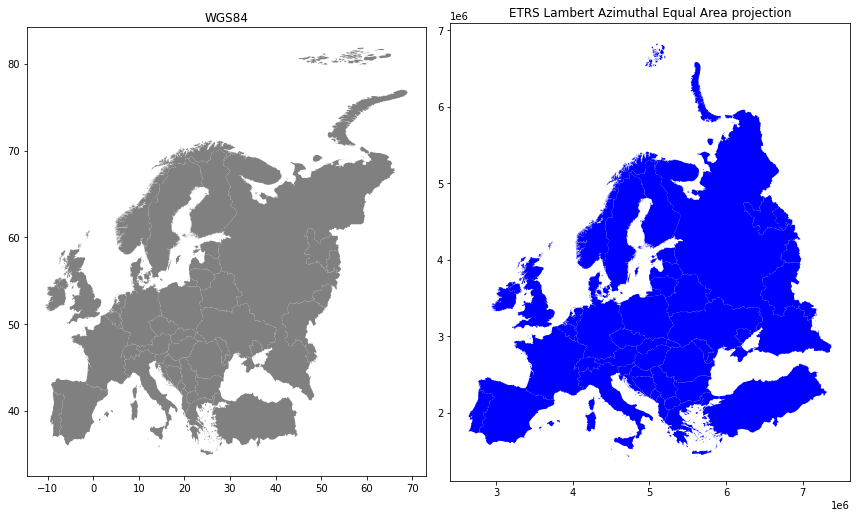

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data_wgs84.plot(ax=ax1, facecolor='gray');
ax1.set_title("WGS84");
data.plot(ax=ax2, facecolor='blue');
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");
plt.tight_layout()

In [155]:
outfp = "data/L2_data/Europe_borders_epsg3035.shp"

In [159]:
from pyproj import CRS
crs_object = CRS.from_epsg(3035)
crs_object

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.579299533, 24.603629139001, 44.820545196533, 84.722623821813)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azi

In [161]:
print("Name:", crs_object.name)
print("Coordinate system:", crs_object.coordinate_system)
print("Bounds:", crs_object.area_of_use.bounds)

Name: ETRS89-extended / LAEA Europe
Coordinate system: cartesian
Bounds: (-35.579299533, 24.603629139001, 44.820545196533, 84.722623821813)


In [162]:
crs_wkt = crs_object.to_wkt()
print(crs_wkt)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGL

In [163]:
epsg = CRS(crs_wkt).to_epsg()
print(epsg)

3035


In [164]:
data.crs = CRS.from_epsg(3035).to_wkt()
print(data.crs)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGL

In [165]:
outfp = "data/L2_data/Europe_borders_epsg3035.shp"

In [166]:
crs_dict = data_wgs84.crs
cre_object = CRS(data_wgs84.crs)
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)
crs_proj4 = CRS(data_wgs84.crs).to_proj4()
crs_wkt = CRS(data_wgs84.crs).to_wkt()

/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/pyproj/crs/crs.py:1216: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


In [167]:
print("PROJ dictionary:\n", crs_dict)
print("\nCRS object:\n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT):\n",crs_wkt)

PROJ dictionary:
 epsg:4326

CRS object:
 epsg:3035

EPSG code: 
 4326

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs

Well-Known Text (WKT):
 GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


In [170]:
fp = "data/L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
admin = gpd.read_file(fp)

In [171]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

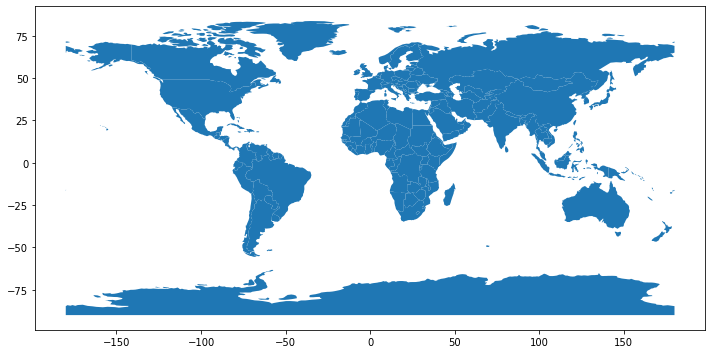

In [173]:
plt.rcParams['figure.figsize'] = [12,6]
admin.plot()

<AxesSubplot:>

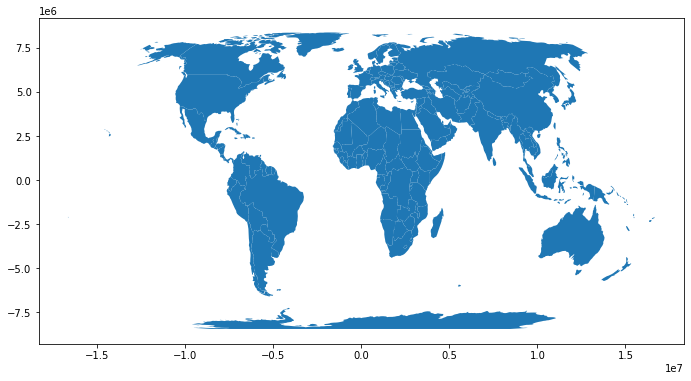

In [179]:
eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
admin.to_crs(eckert_IV).plot()

<AxesSubplot:>

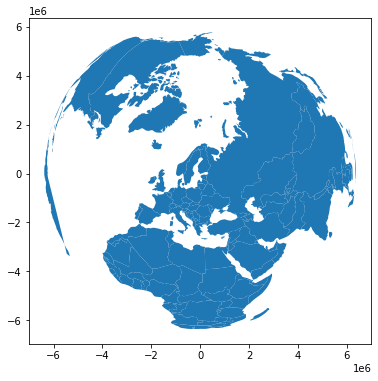

In [180]:
ortho = CRS.from_proj4("+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")
admin.to_crs(ortho).plot()

In [4]:
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point
import matplotlib.pyplot as plt

fp = r"data/L2_data/Europe_borders.shp"
data = gpd.read_file(fp)

In [5]:
hki_lon = 24.9417
hki_lat = 60.1666
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])
print(helsinki)

                    geometry
0  POINT (24.94170 60.16660)


/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
aeqd = CRS(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs
helsinki = helsinki.to_crs(crs=aeqd)
print(helsinki)

                  geometry
0  POINT (0.00000 0.00000)


In [7]:
europe_borders_aeqd = data.copy()

In [8]:
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd)
print(europe_borders_aeqd.head(2))

            TZID                                           geometry
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.801, -1058052.5...
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....


<AxesSubplot:>

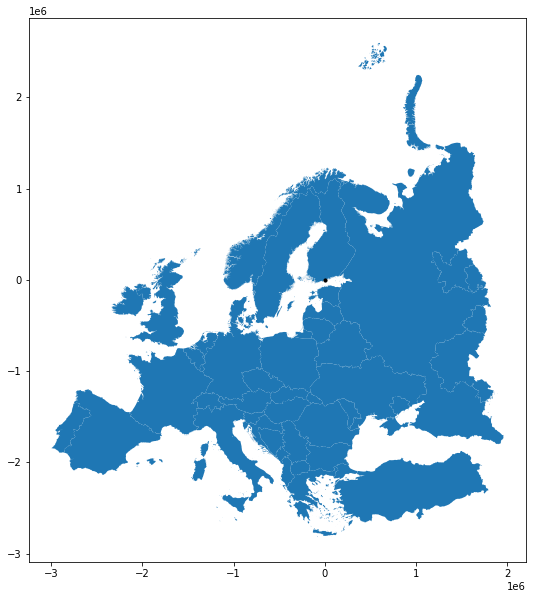

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
europe_borders_aeqd.plot(ax=ax)
helsinki.plot(ax=ax, color='black', markersize=10)

In [10]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid
print(europe_borders_aeqd.head(2))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.801, -1058052.5...   
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....   

                            centroid  
0   POINT (-1057718.135 -492420.566)  
1  POINT (-1218235.217 -1242668.589)  


In [11]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    dist = row[src_col].distance(dest_geom)
    dist_km = dist / 1000
    row[target_col] = dist_km
    return row


In [12]:
helsinki_geom = helsinki.loc[0, 'geometry']
print(helsinki_geom)

POINT (0 0)


In [13]:
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, dest_geom=helsinki_geom, src_col='centroid', target_col='dist_to_Hki', axis=1)
print(europe_borders_aeqd.head(10))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.801, -1058052.5...   
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....   
2  Europe/Berlin  POLYGON ((-1194521.639 -571726.459, -1194674.9...   
3  Europe/Berlin  POLYGON ((-1185933.276 -571780.053, -1186040.7...   
4  Europe/Berlin  POLYGON ((-1182416.220 -569097.571, -1183274.4...   
5  Europe/Berlin  POLYGON ((-1172799.401 -565749.438, -1175327.7...   
6  Europe/Berlin  POLYGON ((-1162805.427 -563558.434, -1161240.8...   
7  Europe/Berlin  POLYGON ((-1129053.541 -568388.470, -1129252.5...   
8  Europe/Berlin  POLYGON ((-1109126.533 -570899.989, -1109690.5...   
9  Europe/Berlin  POLYGON ((-703490.147 -664009.792, -703842.631...   

                                        centroid  dist_to_Hki  
0    POINT (-1057718.135366077 -492420.56558654)  1166.724332  
1  POINT (-1218235.216877886 -1242668.589260078)  1740.207535  
2  POINT (-1194210.7892317

In [14]:
max_dist = europe_borders_aeqd['dist_to_Hki'].max()
mean_dist = europe_borders_aeqd['dist_to_Hki'].mean()
print("Maximum distance to Helsinki is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to Helsinki is 3470 km, and the mean distance is 1177 km.


In [15]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

In [16]:
newdata = gpd.GeoDataFrame()

In [17]:
newdata['geometry'] = None

In [18]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coordinates)
newdata.at[0,'geometry'] = poly
newdata.at[0, 'location'] = 'Senaatintori'
newdata.crs = CRS.from_epsg(4326).to_wkt()
newdata

geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori

In [19]:
outfp = "data/L2_data/Senaatintori.shp"
newdata.to_file(outfp)

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
fp = r"data/addresses.txt"
data = pd.read_csv(fp, sep=';')

In [21]:
data.head()

id                                           addr
0  1000       Itämerenkatu 14, 00101 Helsinki, Finland
1  1001          Kampinkuja 1, 00100 Helsinki, Finland
2  1002           Kaivokatu 8, 00101 Helsinki, Finland
3  1003  Hermannin rantatie 1, 00580 Helsinki, Finland

In [22]:
from geopandas.tools import geocode

In [23]:
geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

In [24]:
geo.head()

geometry  \
0  POINT (24.91556 60.16320)   
1  POINT (24.93169 60.16902)   
2  POINT (24.94179 60.16989)   
3  POINT (24.97759 60.19361)   

                                             address  
0  Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...  
1  Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...  
2  Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...  
3  Hermannin rantatie, Hermanninmäki, Hermanni, K...

In [25]:
join = geo.join(data)

In [26]:
outfp = r"data/addresses.shp"
join.to_file(outfp)

In [28]:
from shapely.geometry import Point, Polygon
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [30]:
p1.within(poly)

True

In [31]:
p2.within(poly)

False

In [33]:
from shapely.geometry import LineString, MultiLineString
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [34]:
line_a.intersects(line_b)

True

In [35]:
line_a.touches(line_b)

True

In [37]:
import geopandas as gpd

fp = "data/addresses.shp"
data = gpd.read_file(fp)
data.head()

address    id  \
0  Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...  1000   
1  Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...  1001   
2  Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...  1002   
3  Hermannin rantatie, Hermanninmäki, Hermanni, K...  1003   

                                            addr                   geometry  
0       Itämerenkatu 14, 00101 Helsinki, Finland  POINT (24.91556 60.16320)  
1          Kampinkuja 1, 00100 Helsinki, Finland  POINT (24.93169 60.16902)  
2           Kaivokatu 8, 00101 Helsinki, Finland  POINT (24.94179 60.16989)  
3  Hermannin rantatie 1, 00580 Helsinki, Finland  POINT (24.97759 60.19361)

In [38]:
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [40]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gpd.io.file.fiona.drvsupport.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r',
 'KML': 'rw'}

In [48]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson
url = 'https://kartta.hsy.fi/geoserver/wfs'
params = dict(service='WFS',
              version='2.0.0',
              request='GetFeature',
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018',
              outputFormat='json')
r = requests.get(url, params=params)
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [49]:
pop.head()

geometry  index  asukkaita  \
0  MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...   3342        108   
1  MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...   3503        273   
2  MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...   3660        239   
3  MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...   3661        202   
4  MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...   3662        261   

   asvaljyys  ika0_9  ika10_19  ika20_29  ika30_39  ika40_49  ika50_59  \
0         45      11        23         6         7        26        17   
1         35      35        24        52        62        40        26   
2         34      46        24        24        45        33        30   
3         30      52        37        13        36        43        11   
4         30      64        32        36        64        34        20   

   ika60_69  ika70_79  ika_yli80  
0         8         6          4  
1        25         9          0  
2        25        10          2  
3         4         3          3  
4         6         3          2

In [52]:
pop = pop.rename(columns={'asukkaita': 'pop18'})
pop = pop[["pop18", "geometry"]]
addr_fp = r"data/addresses.shp"
addresses = gpd.read_file(addr_fp)
pop.crs = CRS.from_epsg(3879).to_wkt()


In [56]:
addresses = addresses.to_crs(pop.crs)
join = gpd.sjoin(addresses, pop, how="inner", op="within")

<AxesSubplot:>

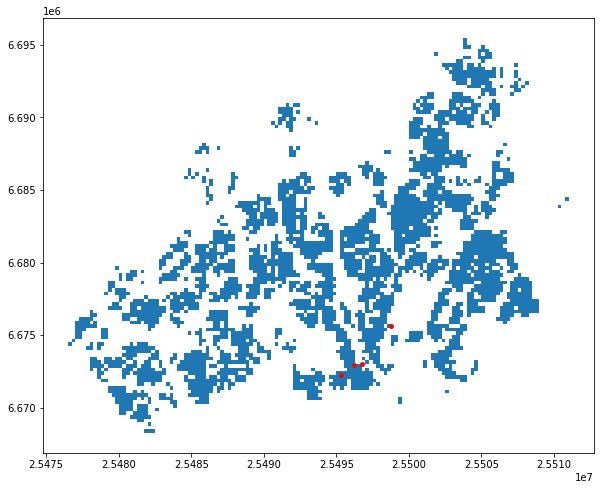

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

fi,ax =plt.subplots(figsize=(15,8))
pop.plot(ax=ax)
addresses.plot(ax=ax,color="red",markersize=15)

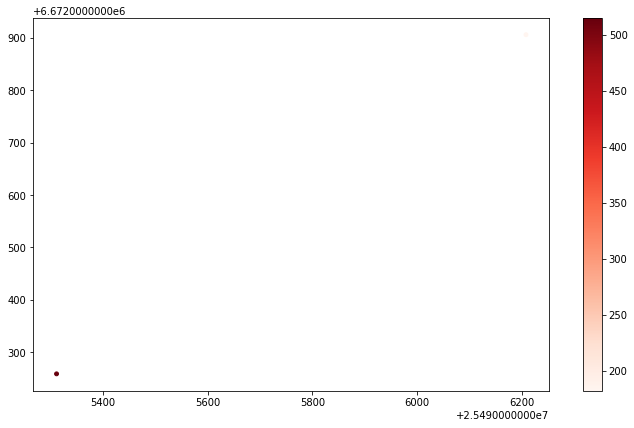

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
join.plot(ax=ax, column='pop18', cmap="Reds", markersize=15, legend=True);
plt.tight_layout()

In [61]:
outfp = r"data/addresses_population.shp"
join.to_file(outfp)

<ipython-input-61-df9f78c0356b>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  join.to_file(outfp)


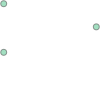

In [64]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
orig = Point(1, 1.67)
dest1 = Point(0, 1.45)
dest2 =Point(2, 2)
dest3 = Point(0, 2.5)
destinations = MultiPoint([dest1, dest2, dest3])
destinations

In [65]:
nearesr_geoms = nearest_points(orig, destinations)

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline
border_fp = "data/L4_data/Helsinki_borders.shp"
grid_fp = "data/L4_data/TravelTimes_to_5975375_RailwayStation.shp"
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

<AxesSubplot:>

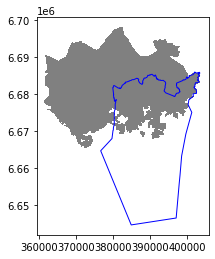

In [70]:
ax = grid.plot(facecolor='gray')
hel.plot(ax=ax, facecolor='None', edgecolor='blue')

In [71]:
assert hel.crs == grid.crs, "CRS differs between layers!"

<AxesSubplot:>

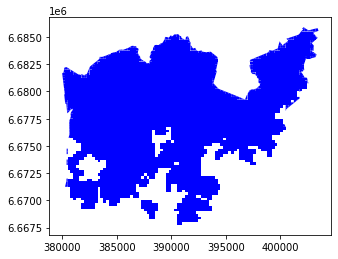

In [73]:
intersection = gpd.overlay(grid, hel, how='intersection')
intersection.plot(color="b")
#重なるところだけ抽出

In [74]:
dissolved = intersection.dissolve(by="car_r_t")

<AxesSubplot:>

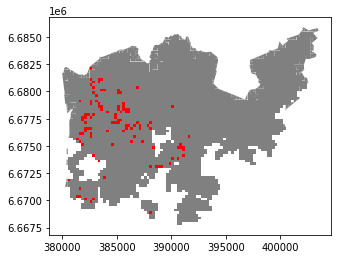

In [75]:
selection = gpd.GeoDataFrame([dissolved.iloc[15]], crs=dissolved.crs)
ax = dissolved.plot(facecolor='gray')
selection.plot(ax=ax, facecolor='red')

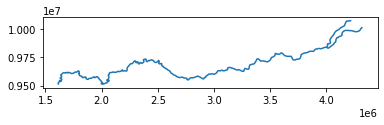

In [78]:
fp = "data/L4_data/Amazon_river.shp"
data = gpd.read_file(fp)
data.plot();

<AxesSubplot:>

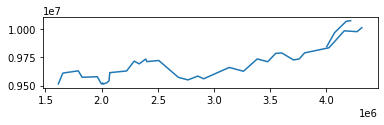

In [79]:
data['geom_gen'] = data.simplify(tolerance=20000)
data = data.set_geometry('geom_gen')
data.plot()
#平滑化？

In [1]:
import geopandas as gpd

fp = "data/L4_data/TravelTimes_to_5975375_RailwayStation.shp"
acc = gpd.read_file(fp)
print(acc.head(2))

/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


   car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   

                                            geometry  
0  POLYGON ((382000.000 6697750.000, 381750.000 6...  
1  POLYGON ((382250.000 6697750.000, 382000.000 6...  


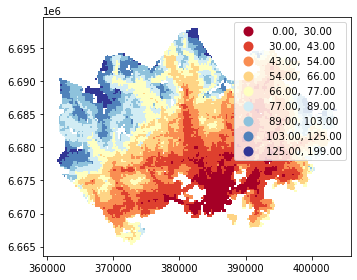

In [3]:
acc = acc.loc[acc['pt_r_tt'] >=0]
%matplotlib inline
import matplotlib.pyplot as plt
acc.plot(column="pt_r_tt", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)
plt.tight_layout()

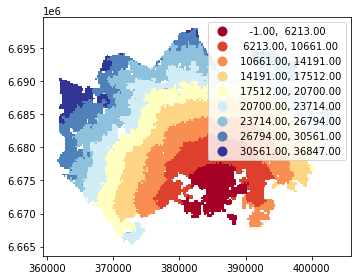

In [4]:
acc.plot(column="walk_d", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)
plt.tight_layout()

In [5]:
import mapclassify
mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  32.00] |  1037
( 32.00,  44.00] |  2386
( 44.00,  54.00] |  2228
( 54.00,  64.00] |  1944
( 64.00,  75.00] |  1517
( 75.00,  87.00] |  1608
( 87.00, 102.00] |  1209
(102.00, 125.00] |   865
(125.00, 199.00] |   226

In [6]:
mapclassify.Quantiles(y=acc['pt_r_tt'])

Quantiles               

    Interval       Count
------------------------
[  0.00,  41.00] |  2674
( 41.00,  52.00] |  2576
( 52.00,  66.00] |  2623
( 66.00,  85.00] |  2616
( 85.00, 199.00] |  2531

In [7]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
classifier.bins

array([ 29.,  42.,  53.,  65.,  76.,  88., 103., 125., 199.])

In [9]:
classifier = mapclassify.NaturalBreaks.make(k=9)

In [11]:
classifications = acc[['pt_r_tt']].apply(classifier)
acc['nb_pt_r_tt'] = acc[['pt_r_tt']].apply(classifier)

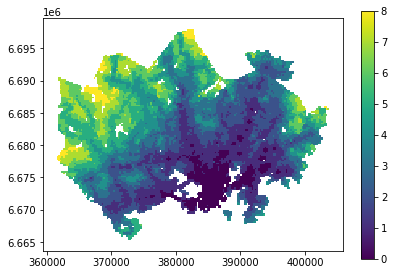

In [12]:
acc.plot(column="nb_pt_r_tt", linewidth=0, legend=True)
plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

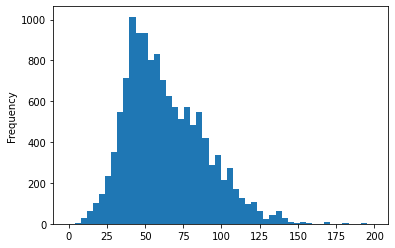

In [13]:
acc['pt_r_tt'].plot.hist(bins=50)

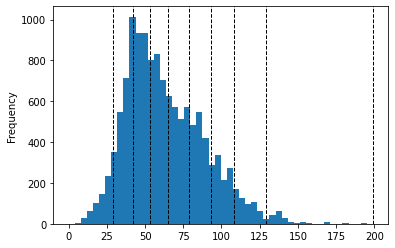

In [14]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
acc['pt_r_tt'].plot.hist(bins=50)
for value in classifier.bins:
    plt.axvline(value, color='k', linestyle='dashed', linewidth=1)

In [15]:
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
   # 1. If the value in src_col1 is LOWER than the threshold1 value
   # 2. AND the value in src_col2 is HIGHER than the threshold2 value, give value 1, otherwise give 0
   if row[src_col1] < threshold1 and row[src_col2] > threshold2:
       # Update the output column with value 0
       row[output_col] = 1
   # If area of input geometry is higher than the threshold value update with value 1
   else:
       row[output_col] = 0

   # Return the updated row
   return row

In [16]:
acc["suitable_area"] = None

# Use the function
acc = acc.apply(custom_classifier, src_col1='pt_r_tt',
                src_col2='walk_d', threshold1=20, threshold2=4000,
                output_col="suitable_area", axis=1)

# See the first rows
acc.head(2)

car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   

                                            geometry  nb_pt_r_tt  \
0  POLYGON ((382000.000 6697750.000, 381750.000 6...           8   
1  POLYGON ((382250.000 6697750.000, 382000.000 6...           8   

   suitable_area  
0              0  
1              0

In [17]:
acc['suitable_area'].value_counts()

0    13011
1        9
Name: suitable_area, dtype: int64

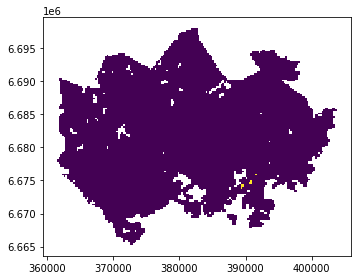

In [18]:
acc.plot(column="suitable_area", linewidth=0);

# Use tight layour
plt.tight_layout()


In [4]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
%matplotlib inline
grid_fp = "data/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/dataE5/roads.shp"
metro_fp = "data/dataE5/metro.shp"
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [5]:
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


In [6]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

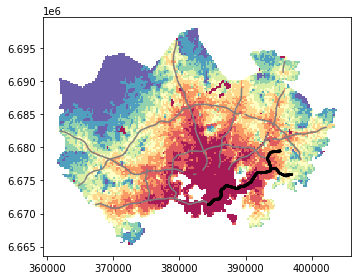

In [7]:
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)
roads.plot(ax=my_map, color="grey", linewidth=1.5)
metro.plot(ax=my_map, color="black", linewidth=2.5)
plt.tight_layout()
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)
outfp = "static_map.svg"
plt.savefig(outfp, format='svg')

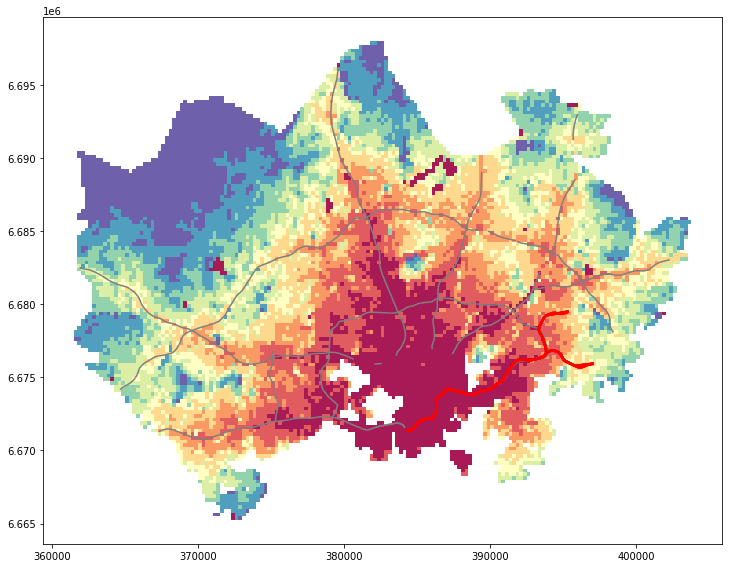

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)
roads.plot(ax=ax, color="grey", linewidth=1.5)
metro.plot(ax=ax, color="red", linewidth=2.5)
plt.tight_layout()

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline
grid_fp = "data/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
grid = gpd.read_file(grid_fp)

In [12]:
grid.crs
data = grid.to_crs(epsg=3857)
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<ipython-input-20-b038f0aeb4b8>:3: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(ax, zoom=11, url=ctx.tile_providers.OSM_A)
<ipython-input-20-b038f0aeb4b8>:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, zoom=11, url=ctx.tile_providers.OSM_A)


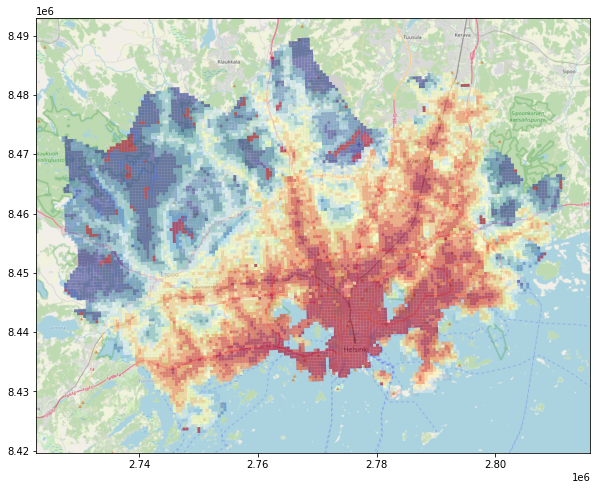

In [20]:
fig ,ax = plt.subplots(figsize=(12,8))
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)
ctx.add_basemap(ax, zoom=11, url=ctx.tile_providers.OSM_A)

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet


In [14]:
points_fp = r"data/dataE5/addresses.shp"
points = gpd.read_file(points_fp)
points.head()

address    id  \
0              Kampinkuja 1, 00100 Helsinki, Finland  1001   
1               Kaivokatu 8, 00101 Helsinki, Finland  1002   
2  Hermanstads strandsväg 1, 00580 Helsingfors, F...  1003   
3                  Itäväylä, 00900 Helsinki, Finland  1004   
4         Tyynenmerenkatu 9, 00220 Helsinki, Finland  1005   

                    geometry  
0  POINT (24.93017 60.16837)  
1  POINT (24.94189 60.16987)  
2  POINT (24.97740 60.18736)  
3  POINT (25.09196 60.21448)  
4  POINT (24.92148 60.15658)

In [16]:
mplleaflet.show()

In [21]:
import folium
m = folium.Map(location=[60.25, 24.8], zoom_start=10, control_scale=True)

In [22]:
m

In [23]:
outfp = "base_map.html"
m.save(outfp)

In [24]:
m = folium.Map(location=[40.730610, -73.935242], tiles='Stamen Toner',
                zoom_start=12, control_scale=True, prefer_canvas=True)

m

In [31]:
m = folium.Map(location=[35.05, 135.8],zoom_start=12, control_scale=True)
folium.Marker(
    location=[ 35.0303161, 135.7843238],
    popup='Yoshida Campus',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)
m

In [32]:
points_gjson = folium.features.GeoJson(points, name="Public transport stations")
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)
points_gjson.add_to(m)
m

In [33]:
folium.LayerControl().add_to(m)
m

In [35]:
points["x"] = points["geometry"].apply(lambda geom: geom.x)
points["y"] = points["geometry"].apply(lambda geom: geom.y)
locations = list(zip(points["y"], points["x"]))
#各点の緯度軽度データをジップで格納

In [37]:
from folium.plugins import HeatMap
m = folium.Map(location=[60.25, 24.8], tiles = 'stamentoner', zoom_start=10, control_scale=True)
HeatMap(locations).add_to(m)
m

In [38]:
from folium.plugins import MarkerCluster

In [39]:
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)
marker_cluster = MarkerCluster(locations)
marker_cluster.add_to(m)
m

In [45]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name)

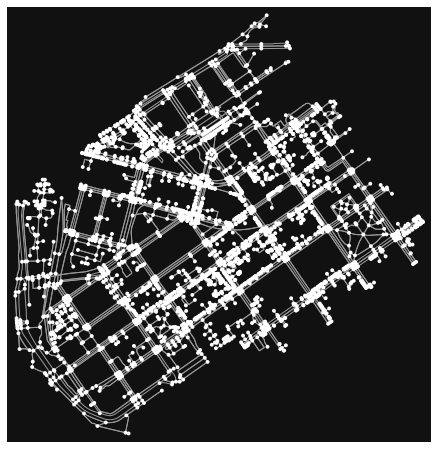

In [46]:
fig, ax = ox.plot_graph(graph)


In [48]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

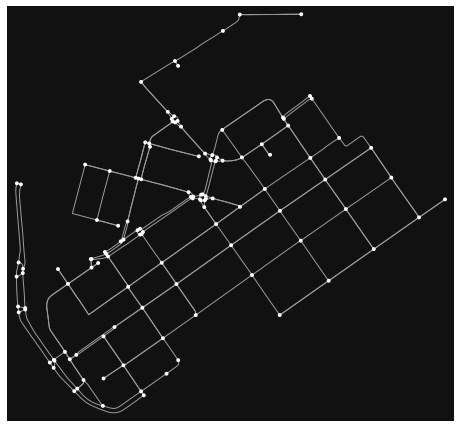

In [50]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(graph)

In [51]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
edges.columns
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
print(edges['highway'].value_counts())

residential      113
tertiary          78
primary           26
secondary         17
unclassified      10
living_street      4
primary_link       1
Name: highway, dtype: int64


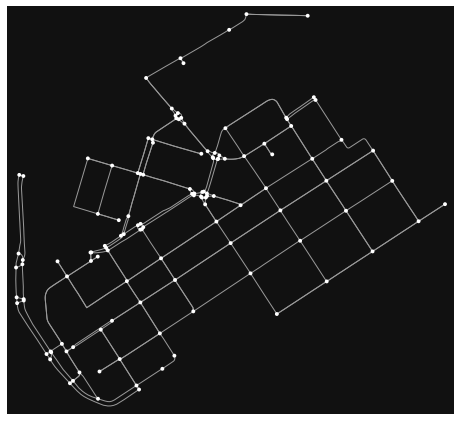

In [53]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [54]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [55]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32635

In [56]:
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
convex_hull = edges_proj.unary_union.convex_hull

/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


In [57]:
area = convex_hull.area
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                    124
m                                                                                    249
k_avg                                                                           4.016129
edge_length_total                                                              19986.981
edge_length_avg                                                                   80.269
streets_per_node_avg                                                            3.217742
streets_per_node_counts                                 {0: 0, 1: 8, 2: 1, 3: 71, 4: 44}
streets_per_node_proportions           {0: 0.0, 1: 0.06451612903225806, 2: 0.00806451...
intersection_count                                                                   116
street_length_total                                                            13671.741
street_segment_count                                                                 183
street_length_avg    

In [59]:
convex_hull = edges_proj.unary_union.convex_hull
centroid = convex_hull.centroid
nodes_proj['x'] = nodes_proj["x"].astype(float)
maxx = nodes_proj['x'].max()
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]

In [60]:
orig_xy = (centroid.y, centroid.x)
target_xy = (target.y, target.x)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')

/Users/m.nomura/Documents/jupyter/plotly-dash-env/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [62]:
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

In [63]:
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=target_xy)

TypeError: plot_graph() got an unexpected keyword argument 'origin_point'